In [ ]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
 !pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('StudentsPerformance.csv')

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
selected_features = df[['math score', 'reading score', 'writing score']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['race/ethnicity_encoded'] = label_encoder.fit_transform(df['race/ethnicity'])
df['parental level of education_encoded'] = label_encoder.fit_transform(df['parental level of education'])
df['lunch_encoded'] = label_encoder.fit_transform(df['lunch'])
df['test preparation course_encoded'] = label_encoder.fit_transform(df['test preparation course'])

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_encoded,race/ethnicity_encoded,parental level of education_encoded,lunch_encoded,test preparation course_encoded
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1


In [ ]:
selected_features = df[['math score', 'reading score', 'writing score',
                        'gender_encoded', 'race/ethnicity_encoded', 'parental level of education_encoded',
                        'lunch_encoded', 'test preparation course_encoded']]

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(selected_features)
    wcss.append(kmeans.inertia_)

In [ ]:
print("WCSS values for different values of K:")
for k, wcss_value in enumerate(sse, 1):
    print(f"K={k}: sse={wcss_value}")

WCSS values for different values of K:
K=1: WCSS=678708.6170000001
K=2: WCSS=287263.70378832065
K=3: WCSS=182776.1748953957
K=4: WCSS=141660.42688866105
K=5: WCSS=116595.80055519004
K=6: WCSS=102758.59302058398
K=7: WCSS=91741.09598814134
K=8: WCSS=81681.89572214003
K=9: WCSS=73907.25553037625
K=10: WCSS=66954.12435944036


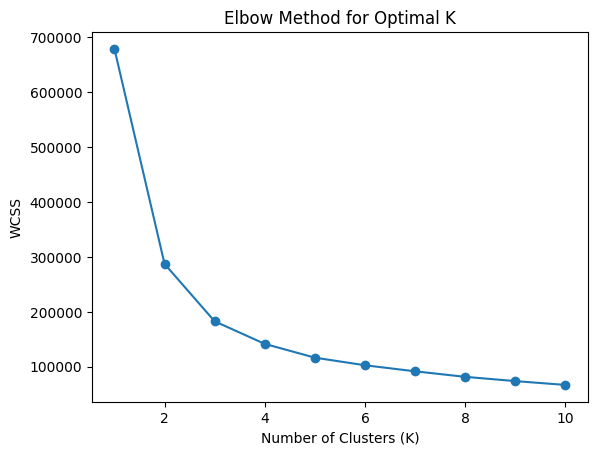

In [ ]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_k = 3

# Apply K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(selected_features)

In [ ]:
df['Cluster'] = cluster_labels

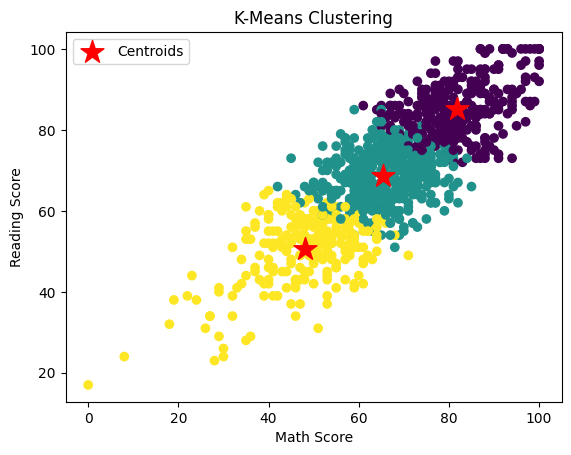

In [ ]:
plt.scatter(df['math score'], df['reading score'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=1000, centers=5, random_state=42)

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Print inertia (sum of squared distances of samples to their closest cluster center)
print("Inertia:", kmeans.inertia_)

# Print silhouette score
silhouette_score = metrics.silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_score)

# Print Davies-Bouldin score
davies_bouldin_score = metrics.davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Score:", davies_bouldin_score)

Inertia: 1873.253011362829
Silhouette Score: 0.6779388924748059
Davies-Bouldin Score: 0.4529893646253519


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data=pd.read_csv('parkinsons.data')

In [ ]:
df=pd.DataFrame(data)
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
X = df.drop(['status', 'name'], axis=1)
y = df['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9487179487179487


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

